# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [10, 20 ,220]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3366,5403,12974,4400,5977,1744
1,17546,4519,4602,1066,2259,2124
2,14755,899,1382,1765,56,749


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

**Answer:**
In order to make a guess for what type of establishments do our sample customers represent, let us first take a look on how much each of our sample customer does spend on different categories. This is shown below : 

In [4]:
df = samples.sum(axis=1)
i=0
for val in samples.itertuples(index=False):
    fresh = float(val.Fresh)/df[i]*100  
    milk = float(val.Milk)/df[i]*100
    grocery = float(val.Frozen)/df[i]*100
    frozen = float(val.Frozen)/df[i]*100
    deter_paper = float(val.Detergents_Paper)/df[i]*100
    delicatessen = float(val.Delicatessen)/df[i]*100

    print 'Customer {}'.format(i+1)
    print "Fresh : {0:.2f}".format(fresh)
    print "Milk : {0:.2f}".format(milk)
    print "Grocery : {0:.2f}".format(grocery)
    print "Frozen : {0:.2f}".format(frozen)
    print "Detergents_Paper : {0:.2f}".format(deter_paper)
    print "Delicatessen : {0:.2f}".format(delicatessen)
    print "-------------------------------------------------------"
    i=i+1
    

Customer 1
Fresh : 9.94
Milk : 15.95
Grocery : 12.99
Frozen : 12.99
Detergents_Paper : 17.65
Delicatessen : 5.15
-------------------------------------------------------
Customer 2
Fresh : 54.63
Milk : 14.07
Grocery : 3.32
Frozen : 3.32
Detergents_Paper : 7.03
Delicatessen : 6.61
-------------------------------------------------------
Customer 3
Fresh : 75.26
Milk : 4.59
Grocery : 9.00
Frozen : 9.00
Detergents_Paper : 0.29
Delicatessen : 3.82
-------------------------------------------------------


In order to get an idea more easily, let us plot these figures for each customer.

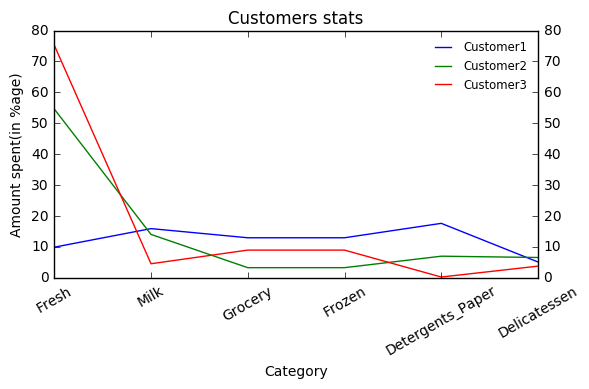

In [5]:
import matplotlib.pyplot as plt

x = [0,1,2,3,4,5]
my_xticks = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']

y1 = [9.94, 15.95, 12.99, 12.99, 17.65, 5.15]
y2 = [54.63, 14.07, 3.32, 3.32, 7.03, 6.61]
y3 = [75.26, 4.59, 9.00, 9.00, 0.29, 3.82]

plt.plot(x,y1)
plt.xlabel('Category')
plt.ylabel('Amount spent(in %age)')
plt.title('Customers stats')
plt.xticks(x,my_xticks, rotation=30)
plt.tick_params(labelright=True)
plt.tight_layout()

plt.plot(x,y2)
plt.xlabel('Category')
plt.ylabel('Amount spent(in %age)')
plt.xticks(x,my_xticks)
plt.tick_params(labelright=True)

plt.plot(x,y3)
plt.xlabel('Category')
plt.ylabel('Amount spent(in %age)')
plt.xticks(x,my_xticks)
plt.tick_params(labelright=True)

plt.legend(['Customer1', 'Customer2', 'Customer3'], loc =1, frameon=False, fontsize = 'small')

In order to get a more detailed analysis, we can do one more thing. Let us see how our sample customers spend on each category as compared to the mean and median of the actual dataset. Thi is shown below.

In [6]:
display(samples - data.mean().round())
display(samples - data.median().round())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-8634.0,-393.0,5023.0,1328.0,3096.0,219.0
1,5546.0,-1277.0,-3349.0,-2006.0,-622.0,599.0
2,2755.0,-4897.0,-6569.0,-1307.0,-2825.0,-776.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-5138.0,1776.0,8218.0,2874.0,5161.0,778.0
1,9042.0,892.0,-154.0,-460.0,1443.0,1158.0
2,6251.0,-2728.0,-3374.0,239.0,-760.0,-217.0


As we can see from the above graph and stats that Customer 1 has high spending in relation to the category median for all categories except Fresh. It could be a big chain retailer. 

Also in relation to the category median for all categories, we see that Customer 2 spends a huge amount on Fresh, Milk, Detergents_Paper and Delicatessen hence it is very likely that it represnts a restaurant or a hotel.

In case of customer3, huge spendings afre done only in case of Fresh and Frozen suggesting that Customer 3 represtnts a small cafe.

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [7]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = data.drop('Grocery',axis=1)

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, data['Grocery'], test_size=0.25, random_state=33)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor 
regressor = DecisionTreeRegressor(random_state=33)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print score

0.414786489653


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

**Answer:**
I attempted to predict the 'Grocery' feature. The prediction score was 0.4147 which is a good prediction score(although not so high).


No, this feature is not necessary for identifying customers' spending habits. This is because that our model predicted a positive and good R^2 score suggesting that it is not relevant at all as its value can still be predicted based on the values of other features, even if it wasn't there in the dataset.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

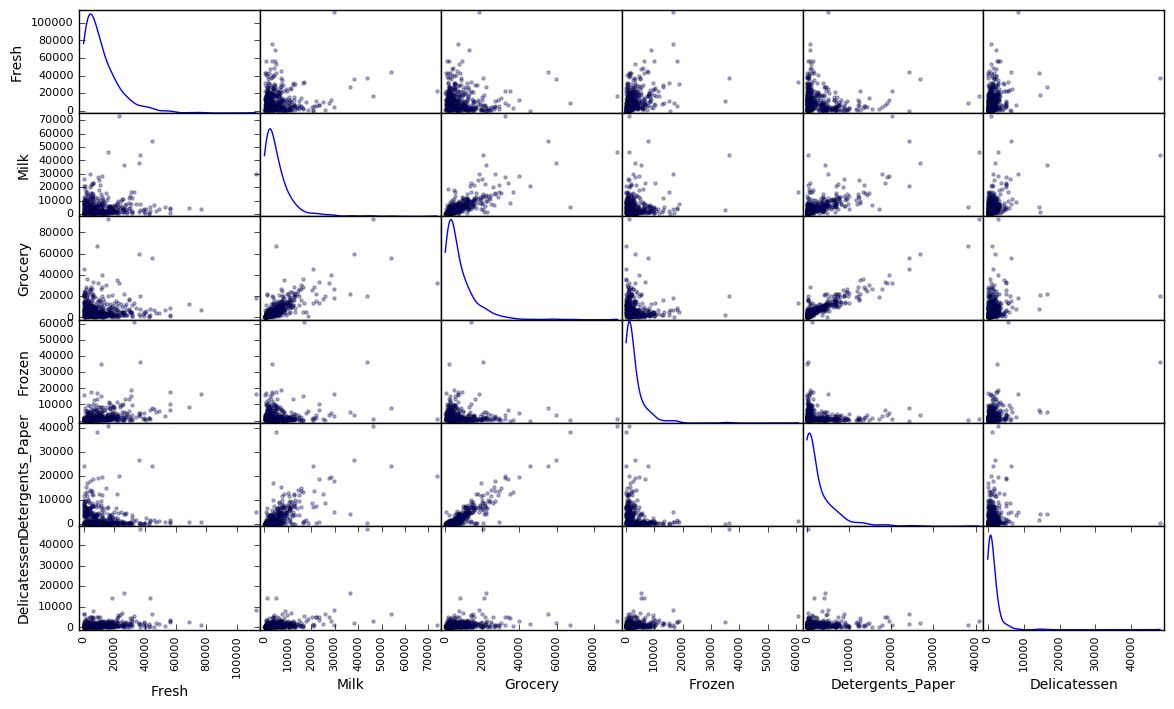

In [8]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

**Answer:**
After observing the scatter plot carefully , we can describe certain pairs having some degree of correlation. Before arriving at a conclusion let us do some plots again to check the degree of correlation.

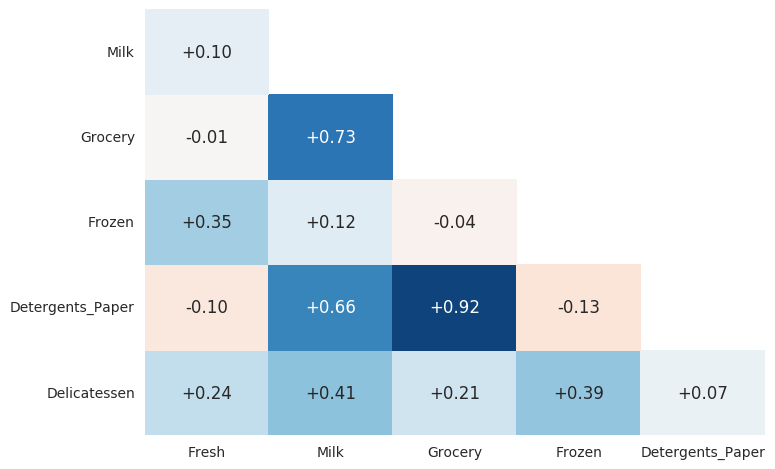

In [9]:
import seaborn as sns

# get the feature correlations
corr = data.corr()

# remove first row and last column for a cleaner look
corr.drop(['Fresh'], axis=0, inplace=True)
corr.drop(['Delicatessen'], axis=1, inplace=True)

# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True

# plot the heatmap
with sns.axes_style("white"):
    sns.heatmap(corr, mask=mask, annot=True, cmap='RdBu', fmt='+.2f', cbar=False)

From the above plot, we can say that few features are higly correlated. The features corresponding to a features as shown below on the right hand side represents some degree of correlation with the feature on the left hand side.

* Grocery -> Detergents_Paper
* Milk -> Detergents_Paper
* Milk -> Grocery


Yes, the above scatter matrix and plot confirm my suspicions about the relevance of the feature, 'Grocery', which I attempted to predict. All the other features are **high positively correlated** with 'Grocery'.

The data for the given features is not normally distributed. If the data were normally distributed, we would have obtained a fair elliptical shape in the scatter matrix as shown below.
![alt text](normal_dist.png "Title")

But as most of the data points in our scatter matrix fan out of the origin, hence our data set is not normally distributed.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

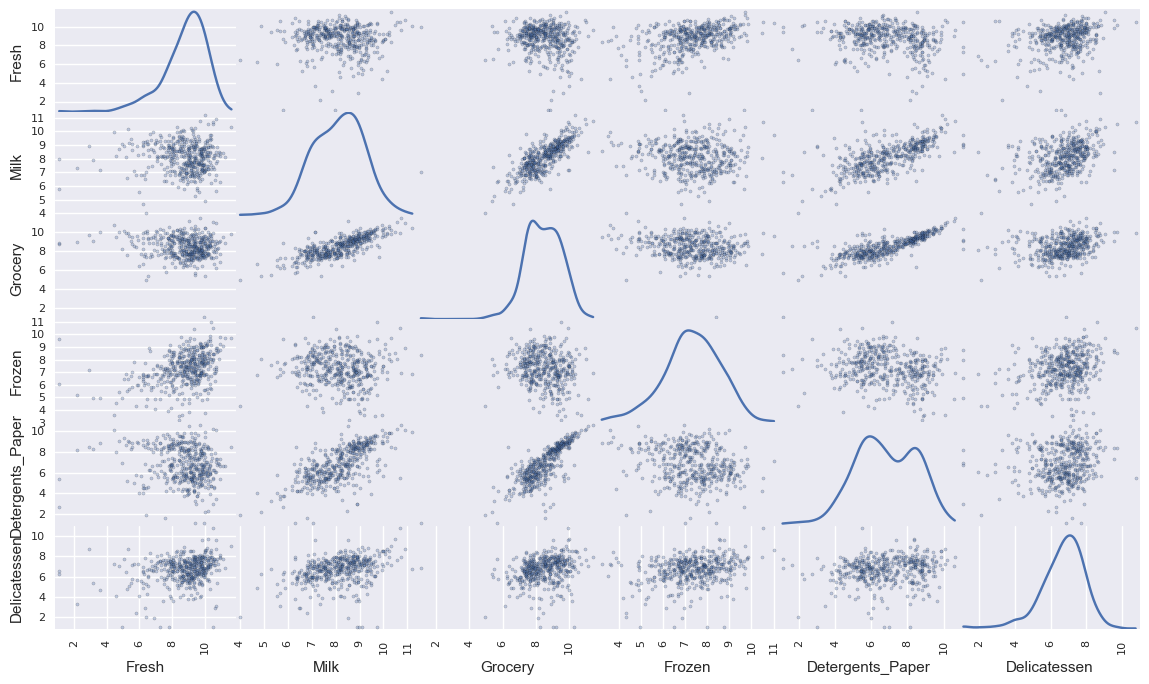

In [10]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

We can get another view of the log-transformed feature distributions,we can plot them with a seabornKDE plot. This is shown below.

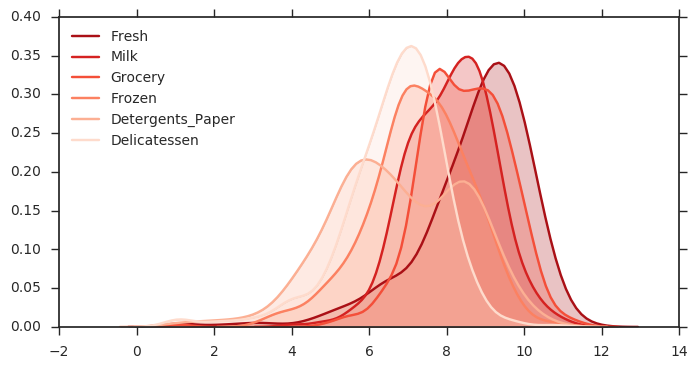

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('ticks')
with sns.color_palette("Reds_r"):
    # plot densities of log-transformed data
    plt.figure(figsize=(8,4))
    for col in data.columns:
        sns.kdeplot(log_data[col], shade=True)
    plt.legend(loc=2)

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [12]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.121480,8.594710,9.470703,8.389360,8.695674,7.463937
1,9.772581,8.416046,8.434246,6.971669,7.722678,7.661056
2,9.599337,6.801283,7.231287,7.475906,4.025352,6.618739


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [13]:
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25.0)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75.0)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [86,183,325,75,66,65,154,128]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


### Question 4
*Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

**Answer:**
In order to see if any data point is considered outliers for more than one feature based on the above definition, let us count it using a simple loop as shown below:

In [14]:
from collections import defaultdict
outliers_count = defaultdict(lambda: 0)

for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature],25.0)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature],75.0)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)
    
    outliers_df = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    
    #Make a dictionary for counting outliers
    for index in outliers_df.index.values:
        outliers_count[index] += 1

max_outlier_count = []
for key in outliers_count.keys():
    if outliers_count[key] > 1:
        max_outlier_count.append((key, outliers_count[key]))
print max_outlier_count
print "No. of data points that are outliers for more than one features : {}".format(len(max_outlier_count))

[(128, 2), (154, 3), (65, 2), (66, 2), (75, 2)]
No. of data points that are outliers for more than one features : 5


As calcualted above, there are five data points in total which are outliers for more than one feature. Yes, these data points should be removed from the dataset because in most of the cases outliers cause a significant difference in mean and median making the data skewed in nature.

Some of the data points were added to the outliers list because some of them were extreme ouliers and some of them were outliers for more than one feature. This might lead to a problem during clustering process as we may not obtain the same number of optimal clusters using various custering algorithms. 

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

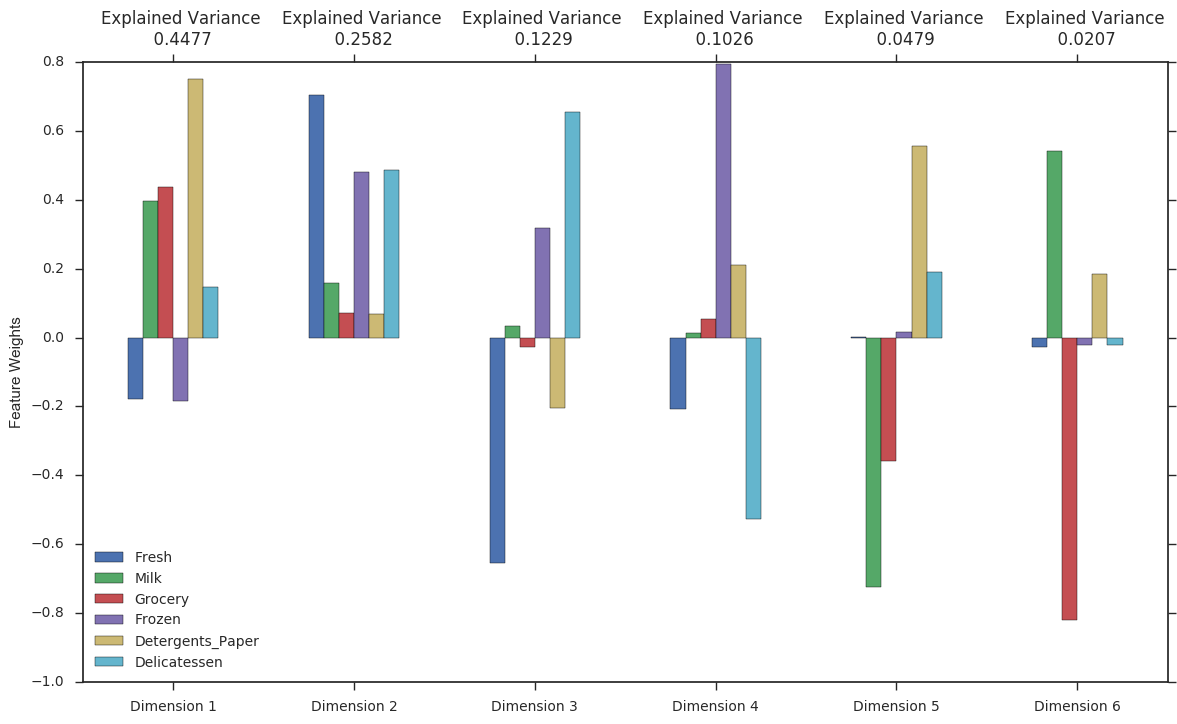

In [15]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

**Answer:**

Almost 70% of the variance is explained in total by the first and second pricipal component.
The first four principal components explains about 93% of the variance in the data as seen from the above visualization.

The first four dimesnions gives us  a visualiztion of the correlation between the features. Detailed explanation for each dimesion is given below:
* **Dimension 1**  :  The first principal component(dimesnion) is made up of large positive weights in Detergents_Paper, and lesser but still sizeable positive weights on Grocery and Milk. It also correlates with a decrease in Fresh and Frozen. This pattern might represent spending in household staples products that are purchased together.

* **Dimension 2**  :  The second principal component(dimesnion) is made up of large positive weights in Fresh, Frozen and Delicatessen. The other features are also made up of positive weights though the weights in these cases are very small. This pattern might represent spending in products that are used in small cafes or restaurants.

* **Dimension 3**  :  The third dimension shows that Fresh is made up of very large negative weights. Detergents_Paper is also made up of negative weights but the negative weights are not that large in this case. Also, Frozen and Delicatessen are made up of large positive weights. This pattern again is an indication of spending in products generally used at cafes or restaurants. 

* **Dimesnion 4**  : The fourth dimension is made up of very learge positive weights in Frozen and sizeable negative weights in Fresh and Delicatessen.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [16]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,2.0946,0.7311,0.8664,1.0392,0.5084,-0.2505
1,0.8352,1.1407,-0.3103,-0.7990,0.4881,0.3060
2,-3.3227,0.1634,0.0220,-0.6762,-0.1631,-0.2441


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [17]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components = 2)
pca.fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform the sample log-data using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [18]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,2.0946,0.7311
1,0.8352,1.1407
2,-3.3227,0.1634


## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

**Answer:**
#### Advantages of using K-Means clustering algorithm :
* K-Means is very simple in nature as well as to implement as compared to other clustering algorithms.
* K-Means is computational faster than other hierarchical clustering algorithms. Time complexity of K-Means is linear with the number of data. Average time complexity of K-Means is O(knT) where n is the number of samples in the data and T is the number of iteration


#### Advantages of using Gaussian Mixture Model clustering algorithm :
* It is very flexible in terms of cluster covariance. With GMM, each cluster can have unconstrained covariance structure. Think of rotated and/or elongated distribution of points in a cluster, instead of spherical as in kmeans as shown in fig. below. As a result, cluster assignment is much more flexible in GMM than in k-means.
![alt text](gmm.png "Title")


* GMM is a probablisitic method which can be used for obtaining fuzzy classification of the observations. The probability of belonging to each cluster is calculated and a classification is usually achieved by assigning each observation to the most likely cluster.

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [19]:
# TODO: Apply your clustering algorithm of choice to the reduced data 
from sklearn.mixture import GMM
clusterer = GMM(n_components =2, random_state=33)
clusterer.fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.means_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
from sklearn.metrics import silhouette_score as s_score
score = s_score(reduced_data, preds, random_state=33)
print score

0.418560168656


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

**Answer:**
After running the previous code cell for different number of clusters(2,3,4,5), the best score is obtained when the number of clusters is equal to three in the Gaussian Mixture Model.

* Number of clusters : 2    ;   Score : 0.418560168656    
* Number of clusters : 3    ;   Score : 0.394057262031
* Number of clusters : 4    ;   Score : 0.341534869599
* Number of clusters : 5    ;   Score : 0.301155702667

For better understanding, please see the visualization below to get an idea og how the score is varying with the number of clusters.

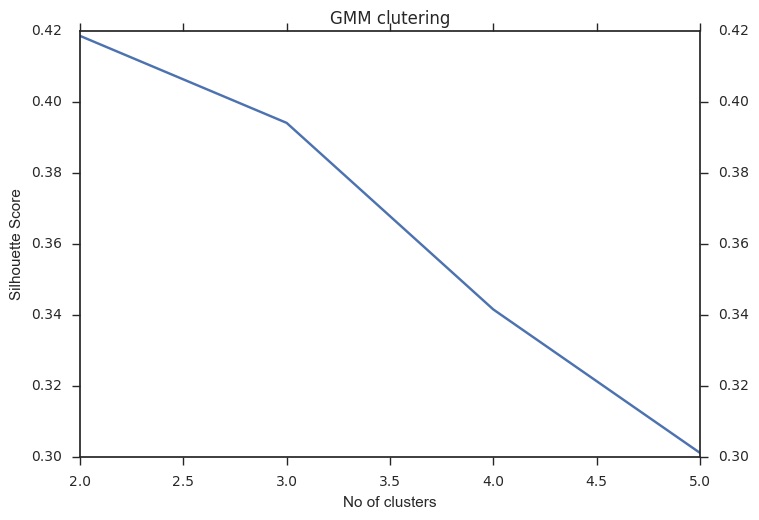

In [20]:
x = [2,3,4,5]
y = [0.418560168656, 0.394057262031, 0.341534869599, 0.301155702667]
plt.plot(x,y)
plt.xlabel("No of clusters")
plt.ylabel("Silhouette Score")
plt.tick_params(labelright=True)
plt.title("GMM clutering")

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

In order to get visualization with optimal number of clusters, let us rewrite the code we did earlier for clustering. This is shown below with optimal number of clusters set eaula to a value of three.

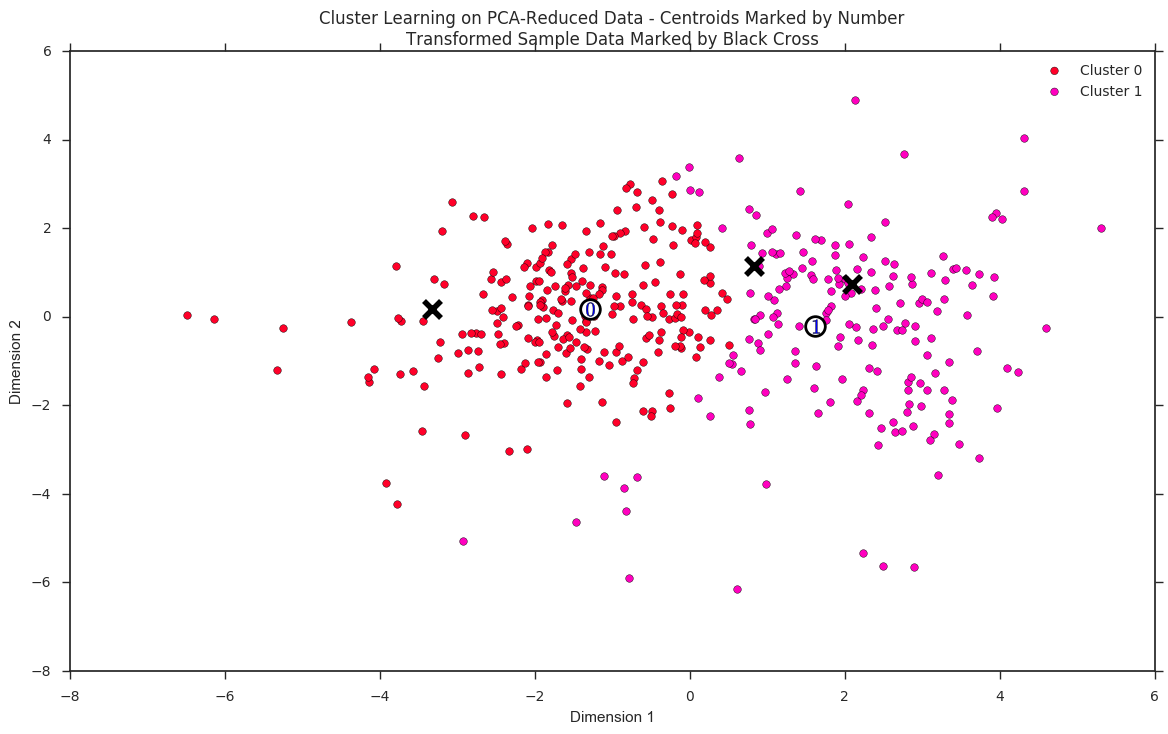

In [21]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [22]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8963.0,2060.0,2702.0,2050.0,345.0,715.0
Segment 1,4099.0,6135.0,9368.0,1001.0,2984.0,913.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

**Answer:**
In order to guess the set of establishments that each customer segment could represnt, let us first take a look at the mean of each feature as described in the statistical description of the dataset at the beginning.
* Fresh -> 12000
* Milk ->  5796
* Grocery -> 7951
* Frozen -> 3071
* Detergents_Paper -> 2881
* Delicatessen -> 1524

#### Segment 0
Comparing the total purchase cost of each category product with the above mean figures, we can observe the following things :
* Purchase cost of **Fresh** and **Frozen** are high and nearby the mean values of these features present in the original dataset. 
* Also, the values **Detergents_Paper** and **Delicatessen** are very low as compared to the mean values of these features in the original datset. 
* The above two points suggest that Segment 0 may represent a **Hotel/Restaurant/Cafe**

#### Segment 1
Similarly comparing the total purchase cost of each category product with the above mean figures, we can observe that:
* Purchase cost of **Milk**, **Grocery**, **Detergents_Paper** are much higher than the mean values of these features in original dataset.
* Purchase cost of **Frozen** and **Delicatessen** are also nearby the mean values.
* The above pattern suggest that Segment 1 may represent a **Retailer**.

For better understanding , a visualization is provided below.

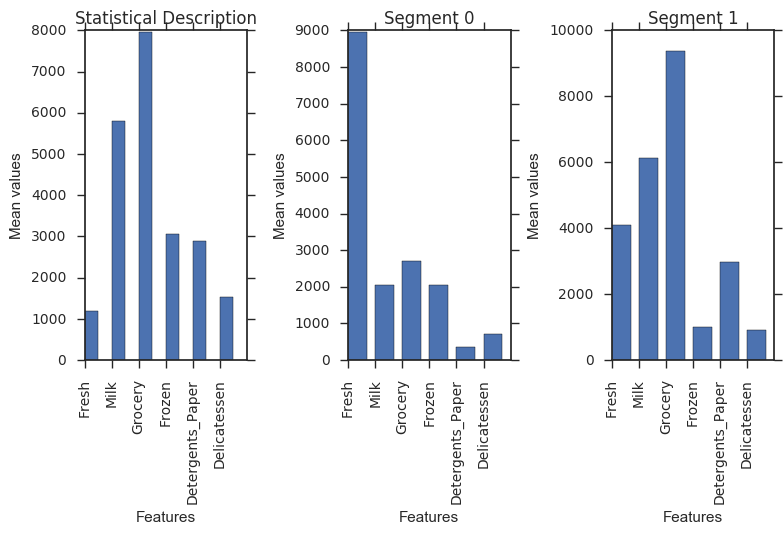

In [23]:
x = [0,1,2,3,4,5]
my_xticks = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen']
y = [1200,5796,7951,3071,2881,1524]
plt.subplot(131)
plt.bar(x,y,width=0.5)
plt.xticks(x,my_xticks, rotation=90)
plt.xlabel('Features')
plt.ylabel('Mean values')
plt.title('Statistical Description')


y = [8963.0, 2060.0, 2702.0, 2050.0, 345.0, 715.0 ]
plt.subplot(132)
plt.bar(x,y,width=0.7)
plt.xticks(x,my_xticks, rotation=90)
plt.xlabel('Features')
plt.ylabel('Mean values')
plt.title('Segment 0')

y=[4099.0, 6135.0, 9368.0, 1001.0, 2984.0, 913.0 ]
plt.subplot(133)
plt.bar(x,y,width=0.7)
plt.xticks(x,my_xticks, rotation=90)
plt.xlabel('Features')
plt.ylabel('Mean values')
plt.title('Segment 1')
plt.tight_layout()


### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [24]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 0


**Answer:**
Sample point 0  and Sample point 1 are predicted as Retailers while Sample 2 is predicted as Hotel/Restaurant/Cafe.

Yes, the predictions for each sample point are consistent with this. This can be proved by comparing the values of 'samples' data ,which is transformed to 'pca_samples' later, to the assumptions that we made in Question 8 based on the data points and values in statistical description. Let us look at the original 'samples' data for making a conclusion.   

In [25]:
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,3366,5403,12974,4400,5977,1744
1,17546,4519,4602,1066,2259,2124
2,14755,899,1382,1765,56,749


And here is the mean values for each feature(taken from statistical description of the original dataset).
* Fresh -> 12000
* Milk ->  5796
* Grocery -> 7951
* Frozen -> 3071
* Detergents_Paper -> 2881
* Delicatessen -> 1524

Again, comparing the values of each feature with the mean values of the 'samples' dataset we can observe the following:
* Purcahsing cost for Sample point 0 is nearby or more than the mean values for the features 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicatessen'. Hence it is likely that Sample point 0 is Retailer (Segment 1).
* Purchasing cost for Sample point 1 is more than the mean values for the features 'Fresh' and 'Delicatessen'. the purchasing cost of all other features is somewhat nearby the mean value of those features. Hence we can say that Sample point 1 is also a Retailer (Segment 1).
* Purchasing cost for Sample point 2 is more than mean value for the feature 'Fresh'. All other purchasing costs of the leftout features  are much lesser than the mean values of those features. Hence we can say that Sample point 2 is a Hotel/Restaurant/Cafe (Segment 0).

To see if a sample is closer to segment 0 or 1 in a given category,we can also plot a heatmap as shown below which will helps to clearify our classification.

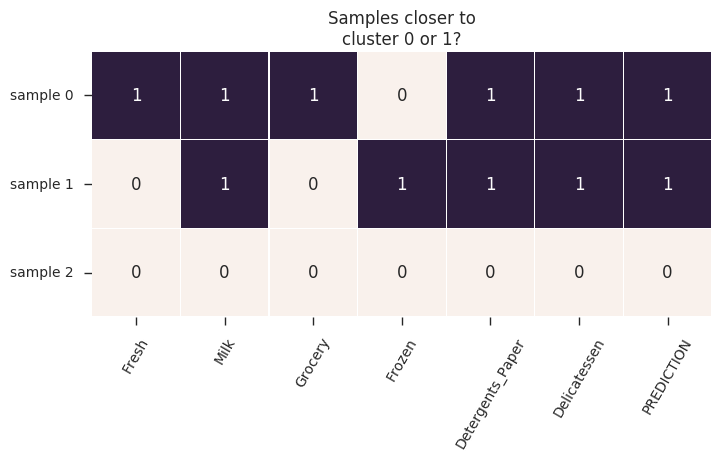

In [26]:
# check if samples' spending closer to segment 0 or 1
df_diffs = (np.abs(samples-true_centers.iloc[0]) < np.abs(samples-true_centers.iloc[1])).applymap(lambda x: 0 if x else 1)

# see how cluster predictions align with similariy of spending in each category
df_preds = pd.concat([df_diffs, pd.Series(sample_preds, name='PREDICTION')], axis=1)
sns.heatmap(df_preds, annot=True, cbar=False, yticklabels=['sample 0', 'sample 1', 'sample 2'], linewidth=.1, square=True)
plt.title('Samples closer to\ncluster 0 or 1?')
plt.xticks(rotation=60, ha='center')
plt.yticks(rotation=0);

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. *How can the wholesale distributor use the customer segments to determine which customers, if any, would reach positively to the change in delivery service?*  
**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**
As we saw above that we are mainly having two clusters of customers. In order to determine which customers would reach positively to the change in delivery service , we can implement A/B testing as follows:

Divide each cluster of segments into two sub segemnts like this:
* Segment 0 -> Segment 0_1 and Segment 0_2
* Segment 1 -> Segment 1_1 and Segment 1_2

Now take two sub-segments randomly one from each segment randomly, say Segment 0_1 and Segment 1_2. For these two sub- segments, change the delivery service from 5 days a week to 3 days a week. For the leftout sub-segments (Segment0_2 and Segment 1_1), keep the deliverly same as it was before. If any of the two selected sub-segments react positively to the change in delivery service, apply the new delivery scheme for that sub-segment. After this, apply the change delivery service for the leftout sub-segments (Segment0_2 and Segment 1_1) and check whether any of them react positively to rthe change in delivery service or not. If yes, then apply the change for that segment.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
*How can the wholesale distributor label the new customers using only their estimated product spending and the* ***customer segment*** *data?*  
**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**
Since we now have cluster segmentation for each of our previous customers, we have an added advantage here. The customer segmentation number i.e. 'Segment 0' and 'Segment 1' can now be included as new feature in our data set along with the old features. We can transform our dataset the as shown below : 

In [27]:
features_data = {'Fresh' : [3366, 17546, 14755, 2000],
                'Milk' : [5403, 4519, 899, 5300],
                'Grocery': [12974, 4602, 1382, 10500],
                'Frozen' : [4400, 1066, 1765, 4500],
                'Detergents_Paper': [5977, 2259, 56,5700],
                'Delicatessen': [1744,2124,749,1900],
                'Customer_segment': ['Segment 0', 'Segment 0', 'Segment 1', 'Segment 0']}
df = pd.DataFrame(features_data)
df

,Customer_segment,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
0,Segment 0,1744,5977,3366,4400,12974,5403
1,Segment 0,2124,2259,17546,1066,4602,4519
2,Segment 1,749,56,14755,1765,1382,899
3,Segment 0,1900,5700,2000,4500,10500,5300


Now here the 'Customer_segment' will be treated as the "target" variable. This data can now be used to train a supervised learning algorithm like RandomForest or SVM which then can be used to predict what type of new customer is depending on the values of all other features in the dataset.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

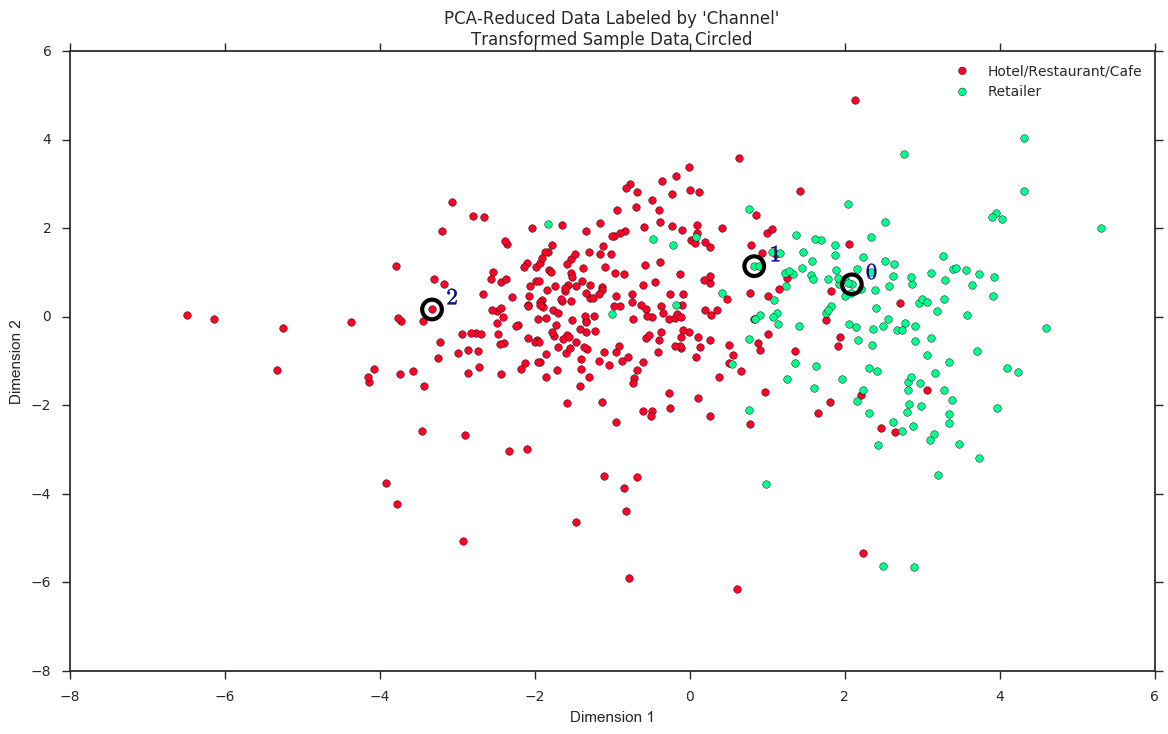

In [28]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**
The clustering algorithm with the number of clusters chosen performs well to this underlying distribution of Hotel/Restaurant/Cafe customers to Retail customers.

Yes there are customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes'  by this distribution. For example, sample point 0 in the above distribution is classified as purely 'Retailer' while sample point 2 is classified as purely 'Hotels/Restaurants/Cafes'.

Yes, these classifications are consistent with our previous definition of customer segments as all sample points(sample point 0, sample point 1, sample point 2) are still predicted in the same clusters a they were before. Also, they lie almost at the same distance from the centroid  even after the 'Channel' feature is reintroduced. This shows that our clustering algorithm is doing quite well.

Refernces : www.google.com, stackoverflow.com, Udacity formus, Quora

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.